In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline



def detect_circles(file, p1, p2, minr, maxr):
    ojos = cv.imread(file, cv.IMREAD_COLOR)
    gray = cv.cvtColor(ojos, cv.COLOR_BGR2GRAY)
    ojos_blur = cv.medianBlur(gray, 5)

    # parametros 
    method = cv.HOUGH_GRADIENT
    dp = 1 # resolucion del acumulador igual a la de la imagen
    minDist = 80 # distancia minima entre centros de los circulos
    param1 = p1 # el maximo umbral del detector de Canny
    param2 = p2 # umbral del acumulador del detector de centros
    minRadius = minr # radio minimo 
    maxRadius = maxr # radio maximo

    circles = cv.HoughCircles(ojos_blur, method, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # perimetro
            cv.circle(ojos, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # centro
            cv.circle(ojos, (i[0], i[1]), 2, (0, 0, 255), 3)
    return ojos, circles

iris, c1 = detect_circles('eyes.jpg', 200, 20, 15, 35)
pupila, c2 = detect_circles('eyes.jpg', 150, 15, 7, 15)
d = c1[0][:] - c2[0][:]
dist = np.around(d.mean(axis=0))
dist[2]

20.0

La distancia entre dos puntos de la circunferencia del iris y de la pupila es de 20 pixeles en promedio


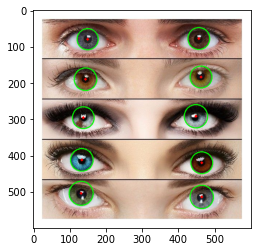

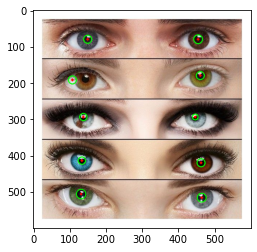

In [2]:
print(f'La distancia entre dos puntos de la circunferencia del iris y de la pupila es de {int(dist[2])} pixeles en promedio')

plt.imshow(cv.cvtColor(iris, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(pupila, cv.COLOR_BGR2RGB))
plt.show()